<a href="https://colab.research.google.com/github/MaricelaMH/SIMULACION-II/blob/main/Metropolis_Hastings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# M É T O D O - M E T R O P O L I S

Aproximaremos la distribución normal con el método de metropolis:
$$ f(x,\mu,\sigma)= \frac{1}{\sigma \sqrt{2\pi}} e ^-\frac{(x-\mu) ^2}{2\sigma ^2}$$

In [1]:
# Importamos librerias
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Definimos nuestra función de la distribucion normal
def f(x,mu,std):
  return(1/np.sqrt(2*np.pi*std**2))*np.exp(-(x-mu)**2/(2*std**2))

In [3]:
# Definimos nuestras variables
mu=0.2
sigma=0.1


In [4]:
delta=0.5  # Entre mas grande delta la aceptación es menor

La aceptación fue del 31.5 %


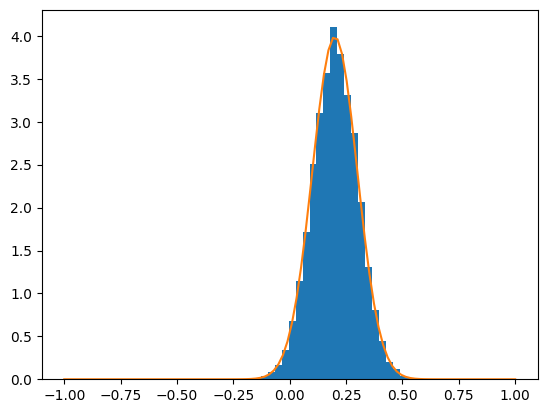

In [5]:
n=50000               # Número de iteraciones (funciona solo cuando "n" es muy grande)
x= np.zeros(n)        # Generamos un vector con puros ceros, aqui se guardaran los valores de las probabilidades
x[0]=0                # Valor inicial de la cadena
acept=0

for i in range(0,n-1):
  y=x[i]+np.random.uniform(-delta,delta)  # Sumaremos el valor inicial mas un numero aleatorio que sigue la distribucion dicha
  if np.random.rand() < min(1,f(y,mu,sigma)/f(x[i],mu,sigma)): # Condicion de metropolis hastings
    x[i+1]=y       #  Si cumple la condición se genera otro número y se almacena el obtenido anteriormente
    acept=acept+1
  else:
    x[i+1]=x[i]  # Si no cumple la condicion, se queda el mismo

# Los números que se van generando conllevan a un movimiento browniano

print("La aceptación fue del",acept/n*100,"%")
plt.hist(x,density=True,bins=25)
xs=np.linspace(-1,1,100)   # La grafica ira de -1 a 1
plt.plot(xs,f(xs,mu,sigma))

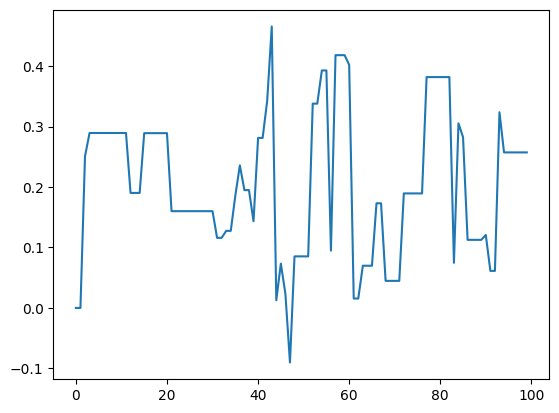

In [6]:
np.mean(x)
np.std(x)
plt.plot(x[0:100])

Distribucion de cochy

In [15]:
# Función de densidad de la distribución de Cauchy
def f_cauchy(x, x0, gamma):
    return 1 / (np.pi * gamma * (1 + ((x - x0) / gamma)**2))

In [16]:
# Parámetros de la distribución Cauchy
x0 = 0   # Localización
gamma = 1  # Escala
delta = 1

La aceptación fue del 83.16 %


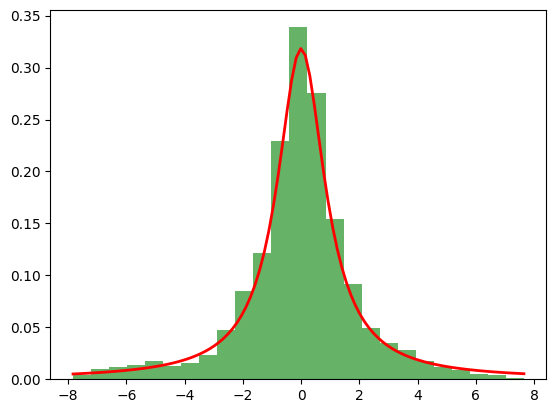

In [24]:
n = 5000  # Número de iteraciones
x = np.zeros(n)  # Vector para los valores generados
x[0] = 0  # Valor inicial
acept = 0

# Algoritmo Metropolis-Hastings
for i in range(0, n-1):
    y = x[i] + np.random.uniform(-delta, delta)  # Genera un nuevo candidato
    if np.random.rand() < min(1, f_cauchy(y, x0, gamma) / f_cauchy(x[i], x0, gamma)):  # Condición de aceptación
        x[i+1] = y
        acept += 1
    else:
        x[i+1] = x[i]

# Imprime la tasa de aceptación
print("La aceptación fue del", acept / n * 100, "%")

# Graficar histograma y función de densidad teórica
plt.hist(x, density=True, alpha=0.6,bins=25, color='g')  # Histograma de los valores generados
xs = np.linspace(min(x), max(x), 100)  # Rango para graficar la densidad teórica
plt.plot(xs, f_cauchy(xs, x0, gamma), 'r', linewidth=2)  # Gráfico de la función de densidad

plt.show()